# AWS를 활용한 인공지능 모델 배포 1

## Contents
1. 클라우드 기초
2. 실습: AWS & 실습 환경 세팅
3. API to serve ML model
4. 실습: Serialization & De-serialization
5. 실습: Inference를 위한 model handler 개발
6. Flask 기반 감정분석 API 개발

## 0. 들어가며

- 클라우드
> 컴퓨터 통신망이 복잡한 네트워크 및 서버 구성 등을 알 필요 없이 구름과 같이 내부가 보이지 않고, 일반 사용자는 이 복잡한 내부를 굳이 알 필요도 없이 어디에서나 구름 속의 컴퓨타 자원으로 자기가 원하는 작업을 할 수 있다는 것.

## 1. 클라우드 기초
1. Before Cloud computing
2. Backgrounds of Cloud computing
3. Cloud Computing
4. Features of Cloud Computing
5. 클라우드 컴퓨팅 운용 모델
6. 클라우드 서비스 제공 모델
7. AWS Cloud Computing

### 1-1. Before Cloud computing
- (1) 과거에는 인터넷 환경에서 서비스를 제공하기 위해 서비스 제공자는 서비스 호스팅에 필요한 모든 것을 직접 구축해야 했음. 서비스 아키텍처나 자원 예상 사용량 등.

    - 데이터 센터(물리적 공간), 서버 / 저장소, 네트워크 방화벽 / 보안, 운영체제 / 기타 개발도구, 전기 / 온도 / 습도 관리, 운영 / 관리 인력


- (1)-1. 하지만 서버를 직접 구축하고 운영하는 자원과 인력 비용이 크고, 운영 상황의 변화에 능동적으로 대응하기가 어려움


- (2) IDC (Internet Data Center), 서버 운영에 필요한 공간, 네트워크, 유지 보수 등의 서비스를 제공함. IDC 입주자가 직접 서버를 구입해 들어오기도 하지만, 불필요한 또는 유휴 자원이 발생하기 때문에 IDC에서 직접 서버를 임대해주기도 함.
    - (2)-1. 서버 임대를 통해 자원을 효율적으로 이용하고 비용을 줄일 수 있었지만 이 또한 계약을 통해 일정 기간 임대를 하는, 유연성이 떨어지는 구조.

### 1-2. Backgrounds of Cloud computing
> 인터넷 사용자가 크게 증가하고 다양한 서비스를 제공하게 되면서 필요한 때에 필요한 만큼 서버를 증설하기를 원하는 온디멘드 수요 증가.

- 개별 서버 자원 사용율은 평균 10~15%로, 다른 사용자들과 공유함으로서 사용률을 향상시켜 자원의 효율적인 활용과 이를 통한 비용 절감을 추구하고자 함.
    - 사용자 접속량이 늘어날때를 위한 오토 스케일링
    - 평상 시 유휴 자원은 비용에서 빼기
    - 운영체제나 필요한 소프트웨어는 미리 설치

### 1-3. Cloud Computing
> 클라우드라고 부르기도 하며, "인터넷 기반 컴퓨팅의 일종"

- 인터넷을 통하여 필요한 만큼의 컴퓨팅 자원을 필요한 시간만큼 활용할 수 있는 컴퓨팅 방식
    - 2006년 아마존이 S3와 EC2를 개시하면서 본격적인 클라우드 컴퓨팅 시대 시작
    
    
- AWS는 클라우드 컴퓨팅을 클라우드 서비스 플랫폼에서 컴퓨팅 파워, DB 저장공간, 애플리케이션 및 기타 IT자원을 필요에 따라 인터넷을 통해 제공하고 사용한 만큼만 비용을 지불하는 것으로 정의.


- 빅데이터의 수집, 저장, 분석을 위한 방대한 컴퓨팅 자원과 인공지능 개발을 위한 고성능 컴퓨터를 별도로 구입하지 않고도, 적은 비용으로 빠르게 필요한 IT 환경 마련 가능.

### 1-4. Features of Cloud Computing
> 클라우드 컴퓨팅은 속도, 접근성, 확장성, 생산성, 보안 및 안정성, 측정가능성 등의 장점을 가짐.

- 특히 인공지능 서비스 제공 시에 도커와 같은 가상화 기술을 통해 GPU 활용과 소프트웨어 설치 및 배포 등의 작업에 비용과 시간 절감.

### 1-5. 클라우드 컴퓨팅 운용 모델
> 구축 및 배포 유형에 따라 퍼블릭(Public), 프라이빗(Private), 하이브리드(Hybrid) 클라우드로 구분.

1. 퍼블릭(Public)
    - 서비스 유지를 위한 모든 인프라와 IT기술을 클라우드에서 사용.
    - AWS, GCP, Azure와 같은 외부 클라우드 컴퓨팅 사업자가 IT자원을 소유하고 인터넷을 통해 제공.
    - IT관리 인력이나 인프라 구축 비용이 없는 경우에 유용
    
    
2. 프라이빗(Private)
    - 고객이 자체 데이터센터에서 직접 클라우드 서비스를 구축하는 형태
    - 내부 계열사나 고객에게만 제공하여 인프라 확충은 쉬우나 IT기술 확보가 어려운 단점이 있음
    - 보안이 좋고 커스터마이제이션 가능하며 글로벌 클라우드 사업자가 IT기술만 패키지 형태로 판매하기도 함.
    
    
3. 하이브리드(Hybrid)
    - 퍼블릭과 프라이빗의 중간 형태.
        - 고객의 핵심 시스템은 내부에 두면서도 외부의 클라우드를 활용하는 형태.
    - IT기술은 클라우드에서 받고 서비스 유지를 위한 인프라는 고객의 것을 혼용
    - 퍼블릭의 경제성과 프라이빗의 보안성을 모두 고려

### 1. 6 클라우드 서비스 제공 모델
> IaaS, PaaS, SaaS 세 가지 형태로 구분

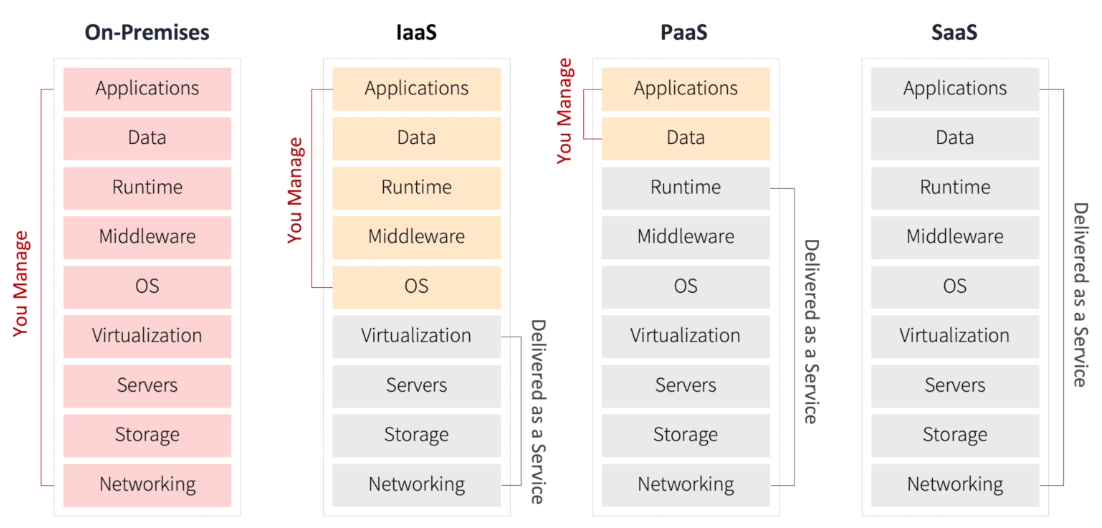

#### 클라우드 서비스 제공 사업자
> AWS, GCP, Azure, NCP 등 다양한 클라우드 벤더들이 클라우드 서비스를 제공

### 1-7. AWS Cloud Computing
> AWS는 인프라와 기초 서비스 뿐만 아니라 사용자 니즈에 맞는 다양한 애플리케이션 서비스를 제공.

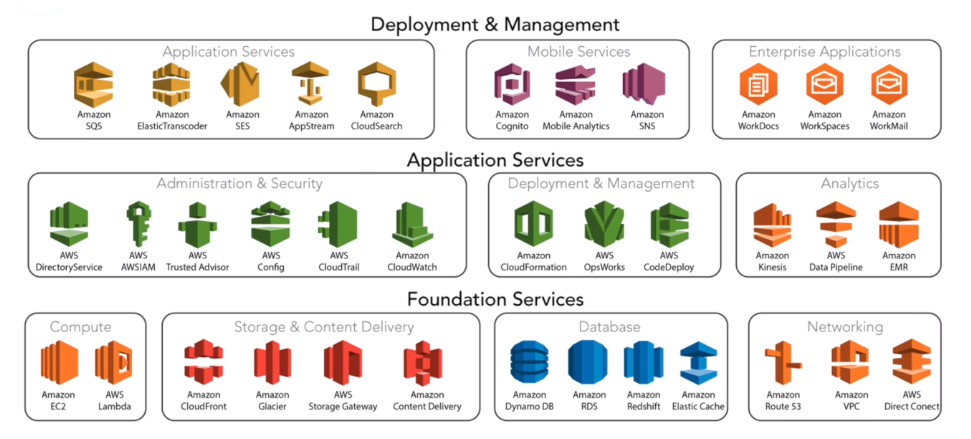